In [2]:
from utils import *
from scipy.stats import qmc

# Dataset

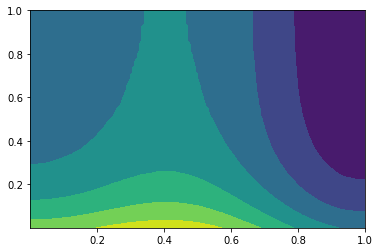

In [11]:
arrsize=65
tmp = np.linspace(0.000001, 1, arrsize, dtype=np.float16)
X, Y = np.meshgrid(tmp, tmp)
Z = 1/6 * ((30 + 5*X*np.sin(5*X)) * (4 + np.exp(-5*Y)) - 100)
Z_noisy = np.random.normal(Z, 0.15)

bigX = np.stack((X, Y), axis=2).reshape(-1,2)
smolY = Z.reshape(-1,1)
smolY_noisy = Z_noisy.reshape(-1,1)

bigX_norm = normalize(bigX)

plt.contourf(X, Y, Z)

In [12]:
ntk = (
    ConstantKernel(
        constant_value=1, 
        constant_value_bounds=(1e-9, 1e5)
    ) * 
    NTK(depth=3, c=2, 
        bias=1e-1, 
        bias_bounds=(1e-9, 1e3)
    ) 
)

gp = GPR(kernel=ntk, alpha=1e-3, n_restarts_optimizer=0, normalize_y=True)
gp.fit(bigX, smolY)
mean_ntk = gp.predict(bigX)

print(gp)
plt.contourf(X, Y, mean_ntk.reshape(-1, arrsize))

/home/rona1das/Documents/code/python/thesis/kernel.py:48: RuntimeWarning: divide by zero encountered in true_divide
  λ = np.clip(Σ_mat / denominator, a_min=-1, a_max=1)
/home/rona1das/Documents/code/python/thesis/kernel.py:48: RuntimeWarning: invalid value encountered in true_divide
  λ = np.clip(Σ_mat / denominator, a_min=-1, a_max=1)


LinAlgError: ("The kernel, 1**2 * NTK(depth=3, c=2.000, bias=0.100), is not returning a positive definite matrix. Try gradually increasing the 'alpha' parameter of your GaussianProcessRegressor estimator.", '1-th leading minor of the array is not positive definite')

GaussianProcessRegressor(alpha=1e-05,
                         kernel=1**2 * Matern(length_scale=1, nu=0.5),
                         normalize_y=True)


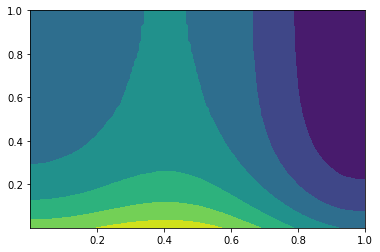

In [13]:
lpk = (
    ConstantKernel(
        constant_value=1, 
        constant_value_bounds=(1e-9, 1e5)
    ) * 
    Matern(
        nu=1/2,
        length_scale=1,
        length_scale_bounds=(1e-1, 1e3), 
    ) 
)

gp = GPR(kernel=lpk, alpha=1e-5, n_restarts_optimizer=0, normalize_y=True)
gp.fit(bigX, smolY)
mean_lpk = gp.predict(bigX)

print(gp)
plt.contourf(X, Y, mean_lpk.reshape(-1, arrsize))

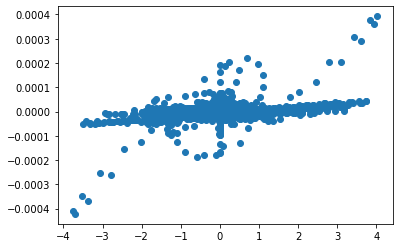

In [16]:
plt.scatter(smolY - mean_ntk, smolY - mean_lpk)

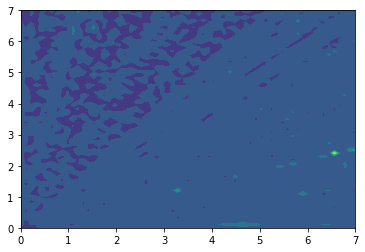

In [3]:
lhs = qmc.LatinHypercube(d=1, seed=234089567)

arrsize=65
tmp = lhs.random(arrsize)
X_lhs, Y_lhs = np.meshgrid(tmp, tmp)
Z_noisy = np.random.normal(np.exp(-X_lhs)*X_lhs**3*np.cos(X_lhs)*np.sin(X_lhs)*(np.cos(X_lhs)*np.sin(X_lhs)**2-1)*(Y_lhs-5), 0.15)

bigX_lhs = np.stack((X_lhs, Y_lhs), axis=2).reshape(-1,2)
smolY_noisy = Z_noisy.reshape(-1,1)

ntk = (
    ConstantKernel(
        constant_value=1, 
        constant_value_bounds=(1e-9, 1e5)
    ) * 
    NTK(depth=3, c=2, 
        bias=1e-1, 
        bias_bounds=(1e-9, 1e3)
    ) 
)

gp = GPR(kernel=ntk, alpha=1e-9, n_restarts_optimizer=0, normalize_y=True)
gp.fit(bigX_lhs, smolY_noisy)
mean = gp.predict(bigX)

plt.contourf(X, Y, mean.reshape(-1, arrsize))

/home/rona1das/Tools/anaconda3/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


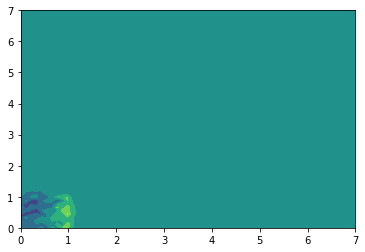

In [5]:
lpk = (
    ConstantKernel(
        constant_value=1, 
        constant_value_bounds=(1e-9, 1e5)
    ) * 
    Matern(
        nu=1/2,
        length_scale=1,
        length_scale_bounds=(1e-1, 1e3), 
    ) 
)

gp = GPR(kernel=lpk, alpha=1e-9, n_restarts_optimizer=0, normalize_y=True)
gp.fit(bigX_lhs, smolY_noisy)
mean = gp.predict(bigX)

plt.contourf(X, Y, mean.reshape(-1, arrsize))

In [ ]:
arrsize=50
tmp = np.linspace(0, 7, arrsize)
X, Y = np.meshgrid(tmp, tmp)
Z = np.exp(-X)*X**3*np.cos(X)*np.sin(X)*(np.cos(X)*np.sin(X)**2-1)*(Y-5)

bigX = np.stack((X, Y), axis=2).reshape(-1,2)
smolY = Z.reshape(-1,1)

ntk = (
    ConstantKernel(
        constant_value=1, 
        constant_value_bounds=(1e-9, 1e5)
    ) * 
    NTK(depth=1, c=2, 
        bias=1e-1, 
        bias_bounds=(1e-9, 1e3)
    ) 
)

bigX = normalize(bigX)

gp = GPR(kernel=ntk, alpha=1e-9, n_restarts_optimizer=9, normalize_y=True)
gp.fit(bigX, smolY)
mean = gp.predict(normalize(bigX))

bigX = bigX.reshape(arrsize, arrsize, 2)
plt.contourf(X, Y, mean.reshape(-1, arrsize))